**SALES DATA ANALYSIS**

**OBJECTIVE**:who is spending more money for
shopping in case of gender, age_group,
state,Occupation,Product_category,marital_status.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('sales_data.csv',encoding='ISO-8859-1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
# fetching null data from Amount col
df.info() 
num=df['Amount'].isnull().sum()
print()
print(f'the number of null values in Amount column is {num}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB

the number of null values in 

In [ ]:
# Droping unwanted columns such as status, unnamed1

df.drop(['Status','unnamed1'],axis=1,inplace=True)


# The Status and unnamed1 consists of only NAN/NULL values so removing both the columns and which will not affect the dataframe

In [ ]:
# Delete all nan values from the data frame
# df.info()
df.dropna(inplace=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
# Rename the column Marital_Status to Marital
new={'Marital_Status':'Marital'}
df.rename(columns=new,inplace=True)

In [ ]:
# change the values of Marital col 0-->single, 1--> married
df['Marital'].unique()
new={0:'single',1:'married'}
df['Marital']=df['Marital'].map(new)

In [ ]:
df['Marital'].unique()

array(['single', 'married'], dtype=object)

In [ ]:
# change the values of Gender col F-->Female, M-->Male
df['Gender'].unique()
new={'F':'Female','M':'Male'}
df['Gender']=df['Gender'].map(new)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

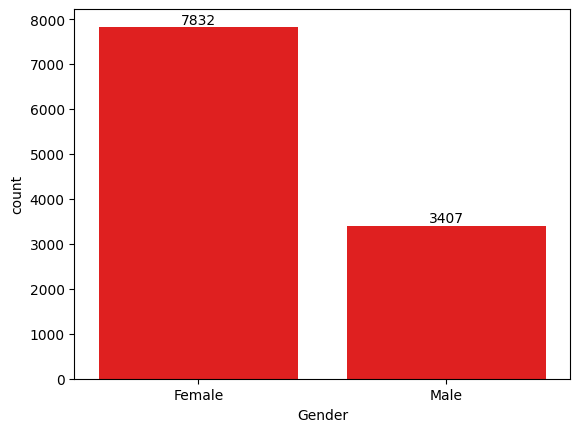

In [ ]:
# visualize the count of males and females based on gender column using seaborn
a=sns.countplot(x='Gender',data=df,color='red')
for i in a.containers:
  a.bar_label(i)

In [ ]:
# group by gender, age_group,state,Occupation,Product_category,marital_status
df.head()
var1=df.groupby('Gender')
var1.groups
female=var1.get_group('Female')
male=var1.get_group('Male')

In [ ]:
var2=df.groupby('Age Group')
var2.groups
df['Age Group'].unique()
a1=var2.get_group('0-17')
a2=var2.get_group('18-25')
a3=var2.get_group('26-35')
a4=var2.get_group('36-45')
a5=var2.get_group('46-50')
a6=var2.get_group('51-55')
a7=var2.get_group('55+')

In [ ]:
var3=df.groupby('State')
var3.groups
df['State'].unique()
s1=var3.get_group('Maharashtra')
s2=var3.get_group('Andhra\xa0Pradesh')
s3=var3.get_group('Uttar Pradesh')
s4=var3.get_group('Karnataka')
s5=var3.get_group('Gujarat')
s6=var3.get_group('Himachal Pradesh')
s7=var3.get_group('Delhi')
s8=var3.get_group('Jharkhand')
s9=var3.get_group('Kerala')
s10=var3.get_group('Haryana')
s11=var3.get_group('Madhya Pradesh')
s12=var3.get_group('Bihar')
s13=var3.get_group('Rajasthan')
s14=var3.get_group('Uttarakhand')
s15=var3.get_group('Telangana')
s16=var3.get_group('Punjab')

In [ ]:
var4=df.groupby('Occupation')
var4.groups
df['Occupation'].unique()
o1=var4.get_group('Healthcare')
o2=var4.get_group('Govt')
o3=var4.get_group('Automobile')
o4=var4.get_group('Construction')
o5=var4.get_group('Food Processing')
o6=var4.get_group('Lawyer')
o7=var4.get_group('Media')
o8=var4.get_group('Banking')
o9=var4.get_group('Retail')
o10=var4.get_group('IT Sector')
o11=var4.get_group('Aviation')
o12=var4.get_group('Hospitality')
o13=var4.get_group('Agriculture')
o14=var4.get_group('Textile')
o15=var4.get_group('Chemical')

In [ ]:
var5=df.groupby('Product_Category')
var5.groups
df['Product_Category'].unique()
p1=var5.get_group('Auto')
p2=var5.get_group('Hand & Power Tools')
p3=var5.get_group('Stationery')
p4=var5.get_group('Tupperware')
p5=var5.get_group('Footwear & Shoes')
p6=var5.get_group('Furniture')
p7=var5.get_group('Food')
p8=var5.get_group('Games & Toys')
p9=var5.get_group('Sports Products')
p10=var5.get_group('Books')
p11=var5.get_group('Electronics & Gadgets')
p12=var5.get_group('Decor')
p13=var5.get_group('Clothing & Apparel')
p14=var5.get_group('Beauty')
p15=var5.get_group('Household items')
p16=var5.get_group('Pet Care')
p17=var5.get_group('Veterinary')
p18=var5.get_group('Office')

In [ ]:
var6=df.groupby('Marital')
var6.groups
df['Marital'].unique()
single=var6.get_group('single')
married=var6.get_group('married')

The Amount spend by female 74335856.43 and male 31913276.0


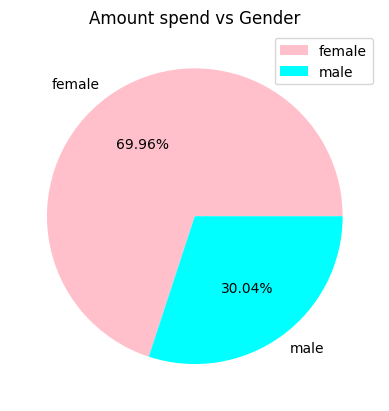

In [ ]:
f1=female['Amount'].sum()
m1=male['Amount'].sum()
print(f'The Amount spend by female {f1} and male {m1}')

values=[f1,m1]
var=['female','male']
plt.pie(values,labels=var,autopct='%0.2f%%',colors=['pink','cyan'])
plt.title('Amount spend vs Gender')
plt.legend()
plt.show()

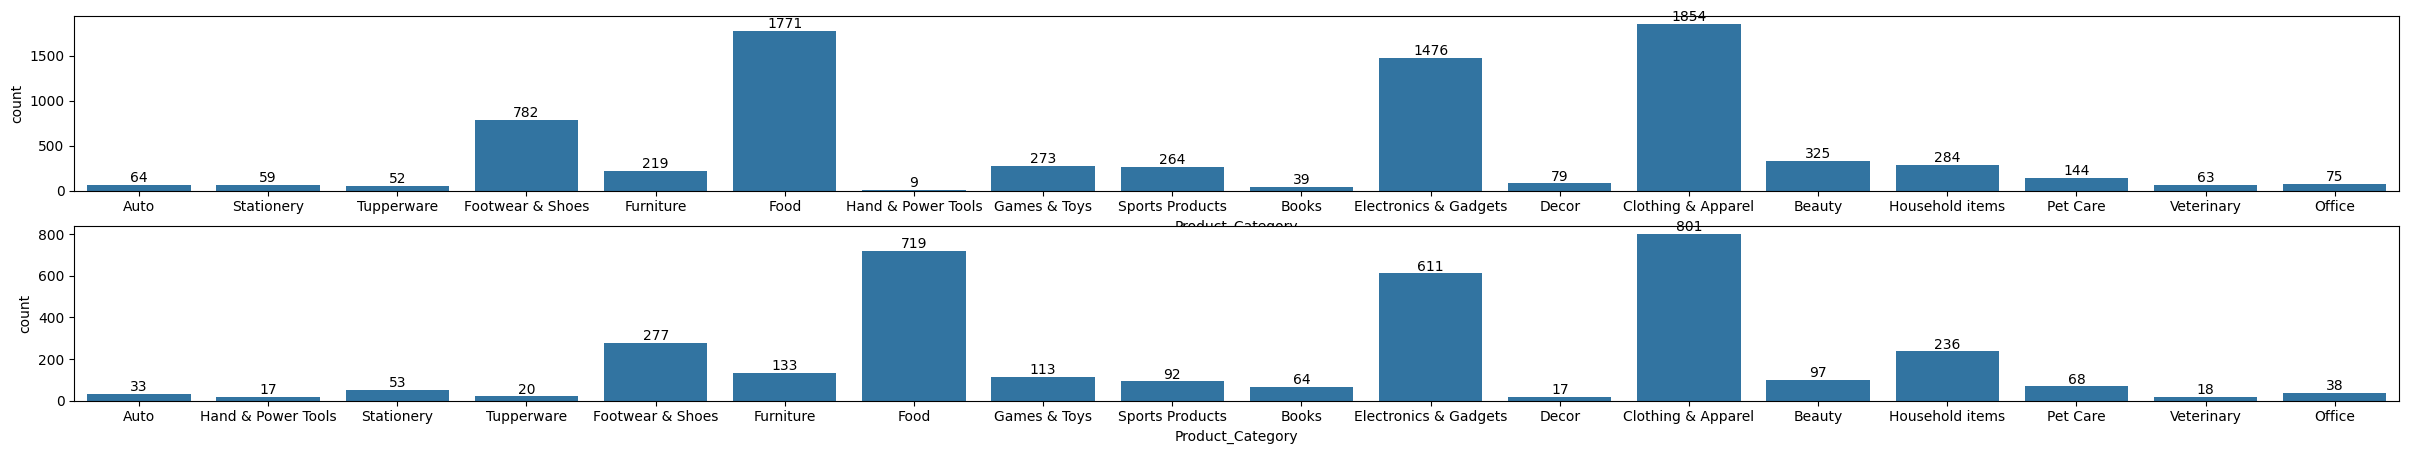

In [ ]:
plt.figure(figsize=(30,5))
plt.subplot(2,1,1)
a=sns.countplot(x='Product_Category',data=female)
for i in a.containers:
  a.bar_label(i)
plt.subplot(2,1,2)
a1=sns.countplot(x='Product_Category',data=male)
for i in a1.containers:
  a1.bar_label(i)

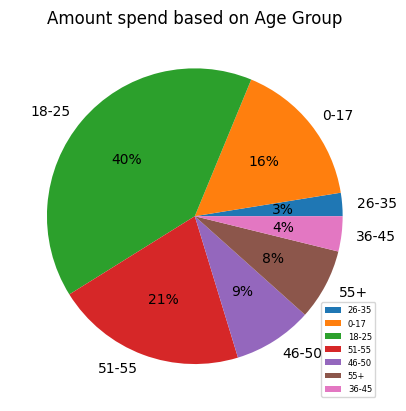

the highest amount spend is 17240732.0 in 18-25 age group and lowest with 42613443.94 and 22144995.490000002 in 26-35 and 36-45


In [ ]:
r1=a1['Amount'].sum()
r2=a2['Amount'].sum()
r3=a3['Amount'].sum()
r4=a4['Amount'].sum()
r5=a5['Amount'].sum()
r6=a6['Amount'].sum()
r7=a7['Amount'].sum()

lst=[r1,r2,r3,r4,r5,r6,r7]
lst1=list(df['Age Group'].unique())
plt.pie(lst,labels=lst1,autopct='%0.0f%%')
plt.title('Amount spend based on Age Group')
plt.legend(loc='lower right',fontsize=6)
plt.show()
print(f'the highest amount spend is {r2} in 18-25 age group and lowest with {r3} and {r4} in 26-35 and 36-45')

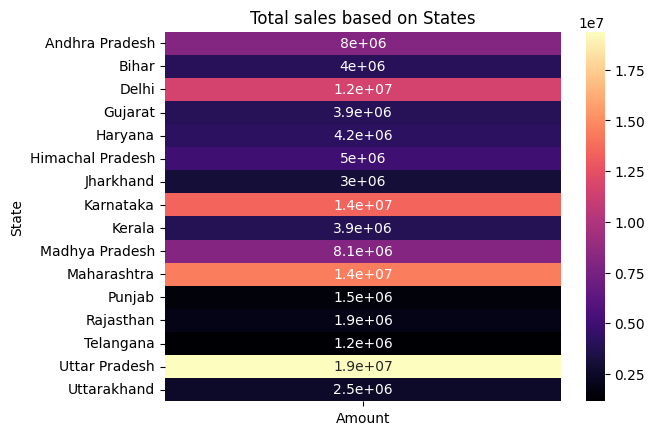

The highest sales is in uttar pradesh with 19374968.0 and lowest in telangan with 1151490.0


In [ ]:
result=df.pivot_table(values='Amount',index='State',aggfunc='sum')
sns.heatmap(result,annot=True,cmap='magma')
plt.title('Total sales based on States')
plt.show()
#  s3,s16,s15
n1=s3['Amount'].sum()
n2=s15['Amount'].sum()

print(f'The highest sales is in uttar pradesh with {n1} and lowest in telangan with {n2}')

In [ ]:
a=df.pivot_table(values=['Amount'],index='Occupation',aggfunc='sum')
a

,Amount
Occupation,
Agriculture,2593087.00
Automobile,5368596.00
Aviation,12602298.00
Banking,10770610.95
Chemical,5297436.00
Construction,3597511.00
Food Processing,4070670.00
Govt,8517212.00
Healthcare,13034587.49


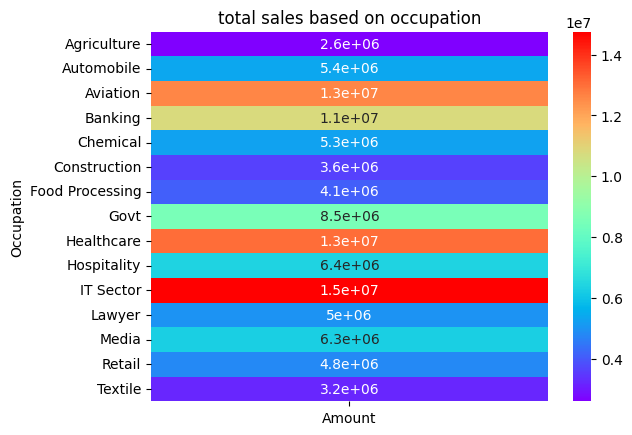

The highest sales amount is 14755079.0 for IT sector and lowest sales amount of 3204972.0 for Textile


In [ ]:
plt.title('total sales based on occupation')
sns.heatmap(a,annot=True,cmap='rainbow')
plt.show()

n1=(o10['Amount'].sum())
n2=(o14['Amount'].sum())
print(f'The highest sales amount is {n1} for IT sector and lowest sales amount of {n2} for Textile')


In [ ]:
result1=df.pivot_table(values=['Amount'],index='Product_Category',aggfunc='sum')
result1

,Amount
Product_Category,
Auto,1958609.99
Beauty,1959484.00
Books,1061478.00
Clothing & Apparel,16495019.00
Decor,730360.00
Electronics & Gadgets,15643846.00
Food,33933883.50
Footwear & Shoes,15575209.45
Furniture,5440051.99


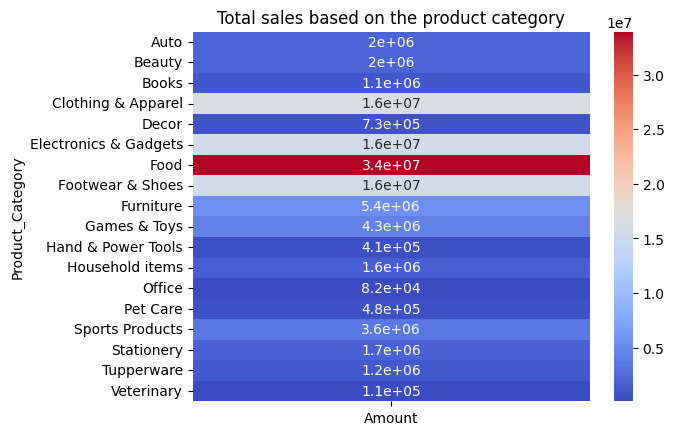

The highest total sales is 33933883.5 for Food category and lowest total sales is 81936.0 for Office category


In [ ]:
sns.heatmap(result1,annot=True,cmap='coolwarm')
plt.title('Total sales based on the product category')
plt.show()

n1=p7['Amount'].sum()
n2=p18['Amount'].sum()
print(f'The highest total sales is {n1} for Food category and lowest total sales is {n2} for Office category')

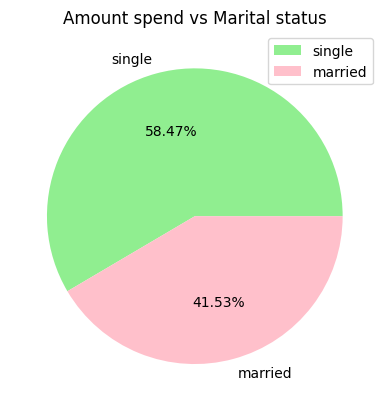

The highest amount is spend by single with {a1} and lowest amount spend by married {a2}


In [ ]:
a1=single['Amount'].sum()
a2=married['Amount'].sum()
lst1=['single','married']
lst2=[a1,a2]
plt.pie(lst2,labels=lst1,autopct='%0.2f%%',colors=['lightgreen','pink'])
plt.title('Amount spend vs Marital status')
plt.legend()
plt.show()

print('The highest amount is spend by single with {a1} and lowest amount spend by married {a2}')

In single highest amount was spent by female and lowest amount spent is male


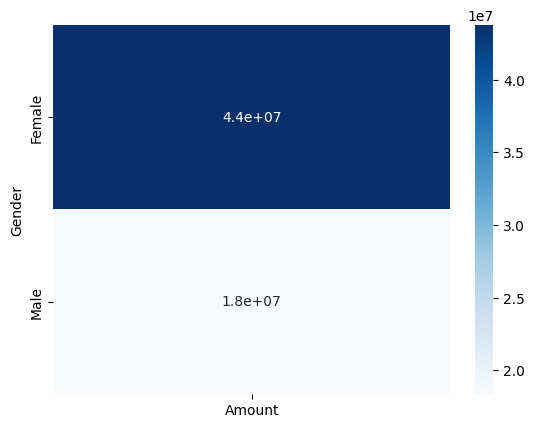

In [ ]:
data1=single.pivot_table(values=['Amount'],index='Gender',aggfunc='sum')
data2=married.pivot_table(values=['Amount'],index='Gender',aggfunc='sum')

sns.heatmap(data1,annot=True,cmap='Blues')

print(f'In single highest amount was spent by female and lowest amount spent is male')

In married highest amount is spend by female and lowest by male


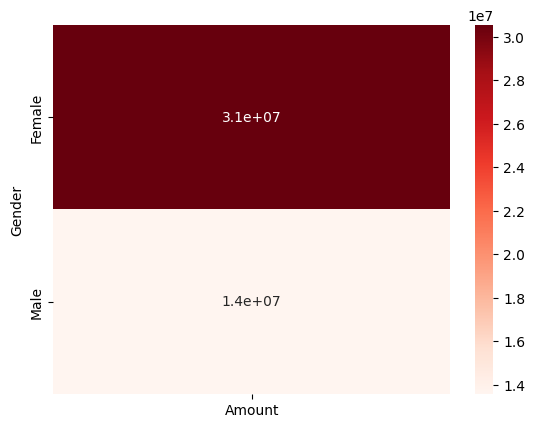

In [ ]:
sns.heatmap(data2,annot=True,cmap='Reds')
print('In married highest amount is spend by female and lowest by male')

**CONCLUSION**
By observing the above graphs we can conclude that amount spend by female is 68.96%(76335856.43) which is high when compared to male with 30.04%(31913276),
maximum amount is spent by 18-25 age group with 40%, based on states highest sales is in uttar pradesh,highest sales is provided by IT sector occupation ,the Food in product_category has the highest sales and finally based on Marital status highest amount is spent by single with 58.47% when compared to married with 41.53%.   
